# SVM

 一、实验目的
1. 通过对已有数据集的处理，掌握支持向量机分类算法
2. 通过选用不同的核函数和调节超参。加深对算法的理解过程。
实验类型：验证
计划课间：4学时

二、实验内容
1. 利用python的sklearn库自带的函数对给定数据集完成分类任务。
2. 选择不同的核函数（线性核，高斯核，多项式核）对同一个数据集进行分类
3. 使用10折交叉验证算法防止过拟合；
4. 用测试集验证得到的模型，并评价（要求评价方法多样性，不只精度）。

三、实验步骤
1. 数据集读入
2. 数据预处理，根据需要进行标准化，归一化处理
3. 将数据集划分为训练集与测试集（交叉验证）
4. 利用训练数据构建模型
5. 用测试数据评价模型的性能
6. 结果分析（可视化）

四、实验心得

五、实验说明
1. 实验数据可采用决策树相同的数据集，便于比较两种算法的效果。
2. 实验内容为两个层次：
第1个层次是调用sklearn库函数完成上述实验流程
第2个层次是训练集与测试集采用交叉验证，模型评价多个指标
3. 独立完成，并撰写实验报告


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

## 导入数据

In [2]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2] # 取前2列 因为要画图(2维)
y = iris.target

## 拆分为训练集&测试集

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

/Users/zhaoxuyan/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 模型训练

In [44]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X_train, y_train) for clf in models)

## 训练准确率

In [29]:
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']
scores = []
for clf in models:
    scores.append(clf.score(X_train, y_train))
show_score = zip(titles,scores)
show_score

[('SVC with linear kernel', 0.83333333333333337),
 ('LinearSVC (linear kernel)', 0.85555555555555551),
 ('SVC with RBF kernel', 0.83333333333333337),
 ('SVC with polynomial (degree 3) kernel', 0.85555555555555551)]

## 交叉验证(10 Fold)(训练准确率取均值)

- Accuracy of SVC with linear kernel

In [11]:
from sklearn.cross_validation import cross_val_score 
scores = cross_val_score(svm.SVC(kernel='linear', C=1.0), X_train, y_train, cv = 10, scoring = 'accuracy')
print scores.mean()

0.822936507937


- Accuracy of LinearSVC (linear kernel)

In [12]:
scores = cross_val_score(svm.LinearSVC(C=C), X_train, y_train, cv = 10, scoring = 'accuracy')
print scores.mean()

0.856944444444


- Accuracy of SVC with RBF kernel

In [13]:
scores = cross_val_score(svm.SVC(kernel='rbf', gamma=0.7, C=C), X_train, y_train, cv = 10, scoring = 'accuracy')
print scores.mean()

0.837222222222


- Accuracy of SVC with polynomial (degree 3) kernel

In [14]:
scores = cross_val_score(svm.SVC(kernel='poly', degree=3, C=C), X_train, y_train, cv = 10, scoring = 'accuracy')
print scores.mean()

0.802222222222


## 模型预测

In [45]:
predicts = []
for clf in models:
    predicts.append(clf.predict(X_test))
predicts

[array([1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1,
        2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2]),
 array([1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 0, 2, 1, 0, 0, 1, 1, 0,
        0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 0, 0, 1,
        2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2]),
 array([1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1,
        2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2]),
 array([1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1,
        2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2])]

## 模型评价

In [46]:
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']
from sklearn.metrics import accuracy_score
accuracy_scores=[accuracy_score(y_test,predicts[0]),accuracy_score(y_test,predicts[1]),
          accuracy_score(y_test,predicts[2]),accuracy_score(y_test,predicts[3])]
show_accuracy = zip(titles,r2_scores)
show_accuracy

[('SVC with linear kernel', 0.50797266514806372),
 ('LinearSVC (linear kernel)', 0.48063781321184507),
 ('SVC with RBF kernel', 0.50797266514806372),
 ('SVC with polynomial (degree 3) kernel', 0.53530751708428248)]

## 可视化

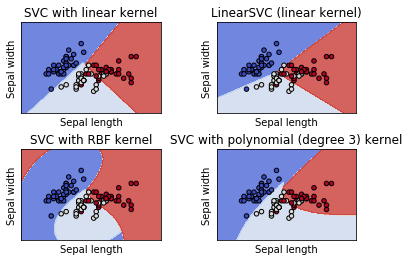

In [41]:
# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## 实验心得

模型的训练准确率达到80%+，而测试准确率只有50%。很郁闷。调整C无果，希望能与王老师讨论如何调参提高测试准确率。